In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv("Indicators_of_Anxiety_or_Depression.csv")
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [51]:
print(df.dtypes)


Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
dtype: object


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [57]:

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [58]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        print(f"Column: {column}")
        print(df[column].describe())


Column: Time Period
count    16092.000000
mean        34.392617
std         20.681589
min          1.000000
25%         16.000000
50%         35.000000
75%         52.000000
max         69.000000
Name: Time Period, dtype: float64
Column: Value
count    16092.000000
mean        28.583979
std          8.580807
min          4.700000
25%         22.900000
50%         28.583979
75%         33.300000
max         85.200000
Name: Value, dtype: float64
Column: Low CI
count    16092.000000
mean        25.058735
std          8.259276
min          3.300000
25%         19.600000
50%         25.000000
75%         29.700000
max         79.900000
Name: Low CI, dtype: float64
Column: High CI
count    16092.000000
mean        32.358612
std          9.076977
min          6.000000
25%         26.400000
50%         32.358612
75%         37.400000
max         89.500000
Name: High CI, dtype: float64


In [59]:
df.describe()

,Time Period,Value,Low CI,High CI
count,16092.000000,16092.000000,16092.000000,16092.000000
mean,34.392617,28.583979,25.058735,32.358612
std,20.681589,8.580807,8.259276,9.076977
min,1.000000,4.700000,3.300000,6.000000
25%,16.000000,22.900000,19.600000,26.400000
50%,35.000000,28.583979,25.000000,32.358612
75%,52.000000,33.300000,29.700000,37.400000
max,69.000000,85.200000,79.900000,89.500000


In [60]:
from scipy import stats 
def detect_outliers_zscores(df, threshold=3):
    outliers_indices = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Ensure the column is numeric
            z_scores = np.abs(stats.zscore(df[column]))
            print(z_scores)
            if not np.isnan(z_scores).all():  # Check if there are any valid Z-Scores
                outliers = df[z_scores > threshold].index
                outliers_indices.extend(outliers)
    return set(outliers_indices)

# Detect outliers
outliers_indices = detect_outliers_zscores(df, threshold=3)
print(outliers_indices)
# Cleaned dataset without outliers
# df_cleaned = df.drop(index=outliers_indices)
# print("Number of outliers detected:", len(outliers_indices))

0        1.614656
1        1.614656
2        1.614656
3        1.614656
4        1.614656
           ...   
16087    1.673395
16088    1.673395
16089    1.673395
16090    1.673395
16091    1.673395
Name: Time Period, Length: 16092, dtype: float64
0        0.592501
1        0.479693
2        0.336107
3        0.440995
4        0.627464
           ...   
16087    0.918821
16088    0.965438
16089    0.674081
16090    1.128598
16091    0.965438
Name: Value, Length: 16092, dtype: float64
0        0.285595
1        0.622503
2        0.116083
3        0.212947
4        0.430891
           ...   
16087    0.866778
16088    0.915210
16089    0.709374
16090    1.145261
16091    1.121045
Name: Low CI, Length: 16092, dtype: float64
0        0.887836
1        0.313042
2        0.557319
3        0.678508
4        0.810715
           ...   
16087    0.942922
16088    0.986991
16089    0.612405
16090    1.075128
16091    0.755629
Name: High CI, Length: 16092, dtype: float64
{7680, 7170, 6148, 14856, 9

In [61]:
df_cleaned = df.drop(index=outliers_indices)
print("Number of outliers detected:", len(outliers_indices))

Number of outliers detected: 234


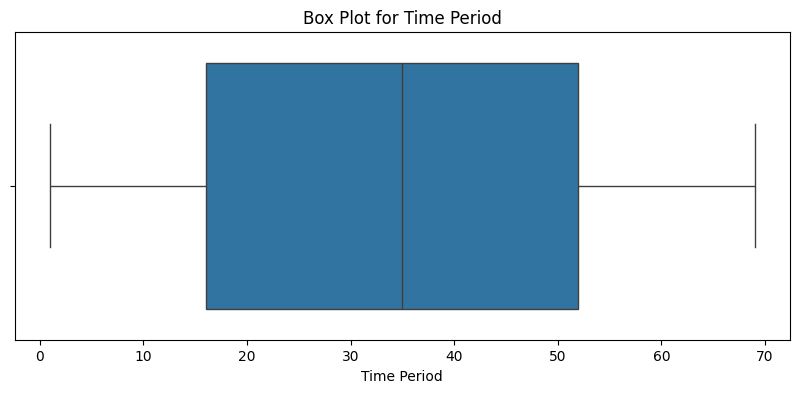

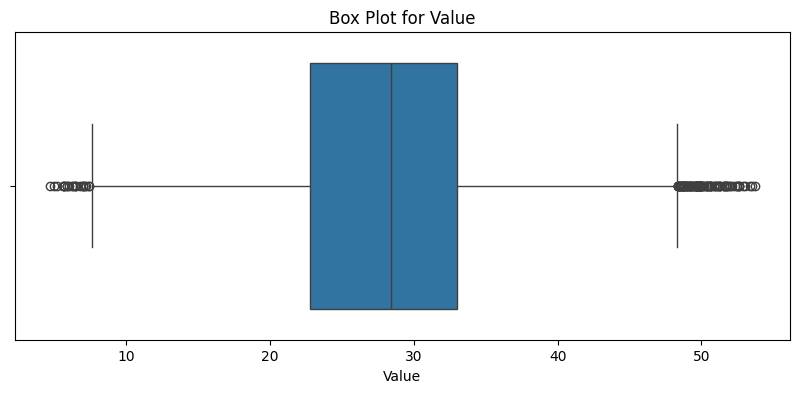

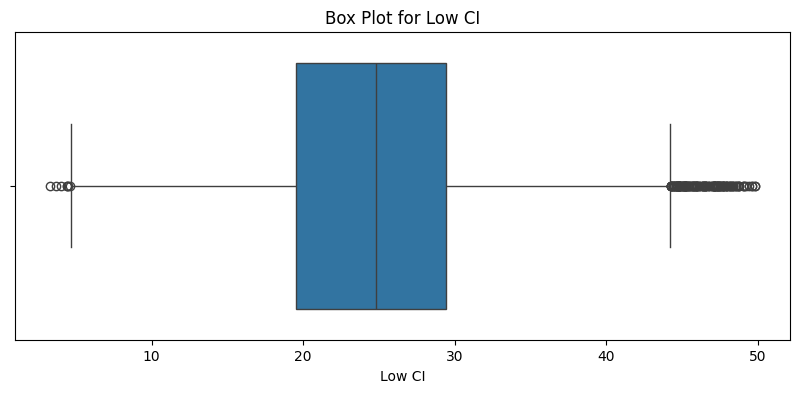

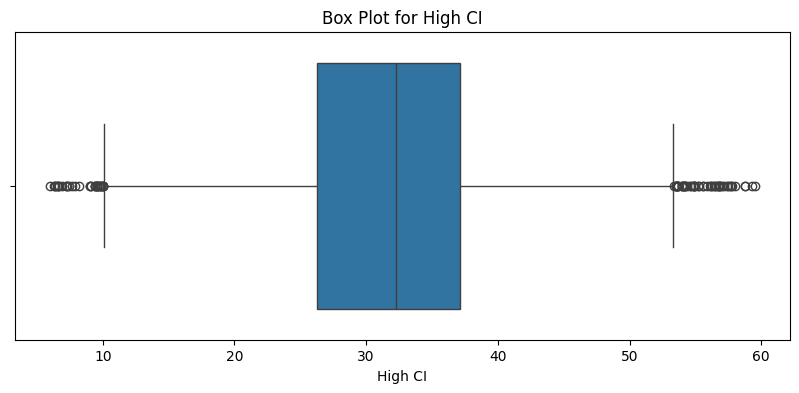

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

In [66]:
del df

In [68]:
df_cleaned

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,20.7,17.9,23.8,17.9 - 23.8,19.2-20.8
16088,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,20.3,17.5,23.4,17.5 - 23.4,19.2-20.8
16089,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,22.8,19.2,26.8,19.2 - 26.8,22.4-24.6
16090,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,4.1,69,"May 28 - Jun 24, 2024",05/28/2024,06/24/2024,18.9,15.6,22.6,15.6 - 22.6,14.8-19.1


In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15858 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               15858 non-null  object 
 1   Group                   15858 non-null  object 
 2   State                   15858 non-null  object 
 3   Subgroup                15858 non-null  object 
 4   Phase                   15858 non-null  object 
 5   Time Period             15858 non-null  int64  
 6   Time Period Label       15858 non-null  object 
 7   Time Period Start Date  15858 non-null  object 
 8   Time Period End Date    15858 non-null  object 
 9   Value                   15858 non-null  float64
 10  Low CI                  15858 non-null  float64
 11  High CI                 15858 non-null  float64
 12  Confidence Interval     15152 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory 